<a href="https://colab.research.google.com/github/Vinoth1512/ML-PROJECTS/blob/main/DAY18_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris
data=load_iris()

In [5]:
df=pd.DataFrame(data['data'])
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
x=df
y=data['target']

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)

In [11]:
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [12]:
prediction=knn.predict([[5,2.9,1,0.2]])

In [13]:
data['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [15]:
confusion_matrix(ytest,ypred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [16]:
accuracy_score(ytest,ypred)

0.9736842105263158

In [17]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [38]:
#K-FOLD VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
LR_score=cross_val_score(LogisticRegression(),x,y)
print(np.average(LR_score)*100)

97.33333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
dt_score=cross_val_score(DecisionTreeClassifier(),x,y)
print(np.average(dt_score)*100)

96.66666666666669


In [26]:
SVC_score=cross_val_score(SVC(),x,y)
print(np.average(SVC_score)*100)

96.66666666666666


In [37]:
Gauss_NB_score=cross_val_score(GaussianNB(),x,y)
print(np.average(Gauss_NB_score)*100)

95.33333333333334


In [39]:
KNN_score=cross_val_score(KNeighborsClassifier(),x,y)
print(np.average(KNN_score)*100)

97.33333333333334


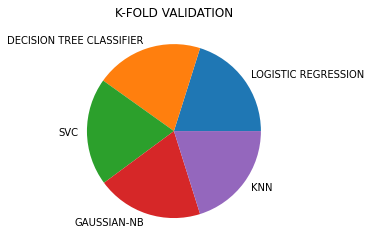

In [41]:
scores=[(np.average(LR_score)),(np.average(dt_score)),(np.average(SVC_score)),(np.average(Gauss_NB_score)),(np.average(KNN_score))]
labels=["LOGISTIC REGRESSION","DECISION TREE CLASSIFIER","SVC","GAUSSIAN-NB","KNN"]
plt.title("K-FOLD VALIDATION")
plt.pie(x=scores,labels=labels)
plt.show()